# Fanno Solver

## Fanno ratios plot

Before explaining the solver, just a quick visual sanity check with the ratios plot.

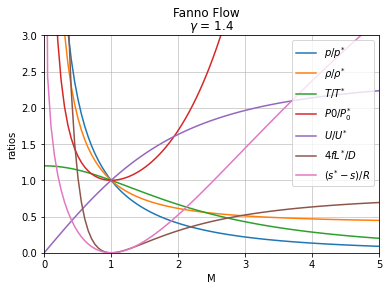

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygasflow import fanno_solver

gamma = 1.4
M = np.linspace(1e-05, 5, 100)
results = fanno_solver("m", M, gamma)

plt.figure()
plt.plot(M, results[1], label=r"$p / p^{*}$")
plt.plot(M, results[2], label=r"$\rho / \rho^{*}$")
plt.plot(M, results[3], label=r"$T / T^{*}$")
plt.plot(M, results[4], label=r"$P0 / P_{0}^{*}$")
plt.plot(M, results[5], label=r"$U / U^{*}$")
plt.plot(M, results[6], label=r"$4f L^{*} / D$")
plt.plot(M, results[7], label=r"$(s^{*}-s)/R$")

plt.xlim(0, max(M))
plt.ylim(0, 3)
plt.xlabel("M")
plt.ylabel("ratios")
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.legend(loc='upper right')
plt.suptitle("Fanno Flow")
plt.title("$\gamma$ = " + str(gamma))
plt.show()

## Examples

This solver allows to quickly compute the Mach number, all the ratios and parameters (entropy paramater, critical friction) by specifying what parameter we do know.

Let's read the solver's documentation:

In [2]:
help(fanno_solver)

Help on function fanno_solver in module pygasflow.solvers.fanno:

fanno_solver(param_name, param_value, gamma=1.4, to_dict=False)
    Compute all Fanno ratios and Mach number given an input parameter.
    
    Parameters
    ----------
    param_name : string
        Name of the parameter given in input. Can be either one of:
    
        * ``'m'``: Mach number
        * ``'pressure'``: Critical Pressure Ratio P/P*
        * ``'density'``: Critical Density Ratio rho/rho*
        * ``'temperature'``: Critical Temperature Ratio T/T*
        * ``'total_pressure_sub'``: Critical Total Pressure Ratio P0/P0*
          for subsonic case.
        * ``'total_pressure_super'``: Critical Total Pressure Ratio P0/P0*
          for supersonic case.
        * ``'velocity'``: Critical Velocity Ratio U/U*.
        * ``'friction_sub'``: Critical Friction parameter 4fL*/D for
          subsonic case.
        * ``'friction_super'``: Critical Friction parameter 4fL*/D for
          supersonic case.
       

This is just a pretty print function...

In [3]:
def print_fanno(M, prs, drs, trs, tprs, urs, fps, eps):
    print("M \t\t {}".format(M))
    print("P/P* \t\t {}".format(prs))
    print("rho/rho* \t {}".format(drs))
    print("T/T* \t\t {}".format(trs))
    print("P0/P0* \t\t {}".format(tprs))
    print("U/U* \t\t {}".format(urs))
    print("4fL*/D \t\t {}".format(fps))
    print("(s*-s)/R \t {}".format(eps))
    print()

In [4]:
result = fanno_solver('m', 2)
print_fanno(*result)

M 		 2.0
P/P* 		 0.408248290463863
rho/rho* 	 0.6123724356957945
T/T* 		 0.6666666666666667
P0/P0* 		 1.6875000000000002
U/U* 		 1.632993161855452
4fL*/D 		 0.3049965025814798
(s*-s)/R 	 0.523248143764548



In [5]:
r1 = fanno_solver('pressure', 0.408248290463863)
r2 = fanno_solver('density', 0.6123724356957945)
r3 = fanno_solver('temperature', 0.6666666666666667)
r4 = fanno_solver('total_pressure_super', 1.6875000000000002)
r5 = fanno_solver('velocity', 1.632993161855452)
r6 = fanno_solver('friction_super', 0.3049965025814798)
r7 = fanno_solver('entropy_super', 0.523248143764548)
print_fanno(*r1)
print_fanno(*r2)
print_fanno(*r3)
print_fanno(*r4)
print_fanno(*r5)
print_fanno(*r6)
print_fanno(*r7)

M 		 2.0000000000000004
P/P* 		 0.40824829046386285
rho/rho* 	 0.6123724356957945
T/T* 		 0.6666666666666665
P0/P0* 		 1.6875000000000007
U/U* 		 1.6329931618554523
4fL*/D 		 0.3049965025814797
(s*-s)/R 	 0.5232481437645482

M 		 2.0
P/P* 		 0.408248290463863
rho/rho* 	 0.6123724356957945
T/T* 		 0.6666666666666667
P0/P0* 		 1.6875000000000002
U/U* 		 1.632993161855452
4fL*/D 		 0.3049965025814798
(s*-s)/R 	 0.523248143764548

M 		 2.0000000000000004
P/P* 		 0.40824829046386285
rho/rho* 	 0.6123724356957945
T/T* 		 0.6666666666666665
P0/P0* 		 1.6875000000000007
U/U* 		 1.6329931618554523
4fL*/D 		 0.3049965025814797
(s*-s)/R 	 0.5232481437645482

M 		 1.9999999999986215
P/P* 		 0.40824829046426947
rho/rho* 	 0.6123724356960291
T/T* 		 0.6666666666670751
P0/P0* 		 1.6874999999980616
U/U* 		 1.6329931618548268
4fL*/D 		 0.30499650258106925
(s*-s)/R 	 0.5232481437633991

M 		 2.0
P/P* 		 0.408248290463863
rho/rho* 	 0.6123724356957945
T/T* 		 0.6666666666666667
P0/P0* 		 1.68750000000000

Should you wish to solve for more than one Mach number of ratio at the same time, you can do:

In [6]:
result = fanno_solver('m', [0.5, 1, 2, 4])
print_fanno(*result)

M 		 [0.5 1.  2.  4. ]
P/P* 		 [2.13808994 1.         0.40824829 0.13363062]
rho/rho* 	 [1.87082869 1.         0.61237244 0.46770717]
T/T* 		 [1.14285714 1.         0.66666667 0.28571429]
P0/P0* 		 [ 1.33984375  1.          1.6875     10.71875   ]
U/U* 		 [0.53452248 1.         1.63299316 2.13808994]
4fL*/D 		 [1.06906031 0.         0.3049965  0.63306493]
(s*-s)/R 	 [0.292553   0.         0.52324814 2.37199454]



We can also use this approach for other parameters. Like this:

In [7]:
result = fanno_solver('friction_super', [1.06906031, 0, 0.3049965, 0.63306493])
print_fanno(*result)

ValueError: It must be 0 <= fp <= 0.8215081164811902

Are you wondering what happened? The first two values inserted correspond to the subsonic solution, but we have asked the solver for the supersonic solution. At those values there is none. Therefore, attention must be used with all the parameteres that use different formulations for subsonic and supersonic case. We can solve them separately: 

In [8]:
r1 = fanno_solver('friction_sub', [1.06906031, 0])
r2 = fanno_solver('friction_super', [0.3049965, 0.63306493])
print_fanno(*r1)
print_fanno(*r2)

M 		 [0.5 1. ]
P/P* 		 [2.13808993 1.        ]
rho/rho* 	 [1.87082869 1.        ]
T/T* 		 [1.14285714 1.        ]
P0/P0* 		 [1.33984375 1.        ]
U/U* 		 [0.53452248 1.        ]
4fL*/D 		 [1.06906031 0.        ]
(s*-s)/R 	 [0.292553 0.      ]

M 		 [1.99999999 3.99999998]
P/P* 		 [0.40824829 0.13363062]
rho/rho* 	 [0.61237244 0.46770717]
T/T* 		 [0.66666667 0.28571429]
P0/P0* 		 [ 1.68749999 10.71874979]
U/U* 		 [1.63299316 2.13808993]
4fL*/D 		 [0.3049965  0.63306493]
(s*-s)/R 	 [0.52324814 2.37199452]

